In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

([], [])

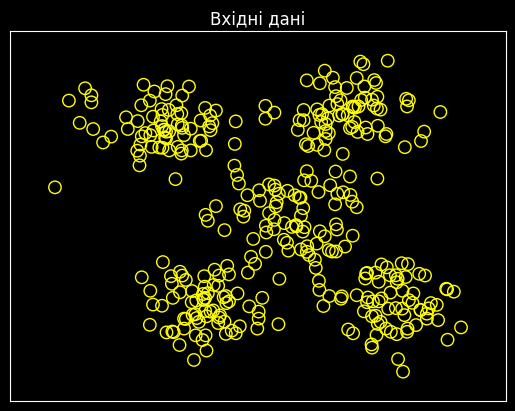

In [2]:
X = np.loadtxt("data_clustering.txt", delimiter=",")
num_clusters = 5

plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="o", facecolors="none", edgecolors="yellow", s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title("Вхідні дані")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [3]:
kmeans = KMeans(init="k-means++", n_clusters=num_clusters, n_init=10)
kmeans.fit(X)
step_size = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

e:\ZTU\7_semester\AI\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\ZTU\7_semester\AI\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


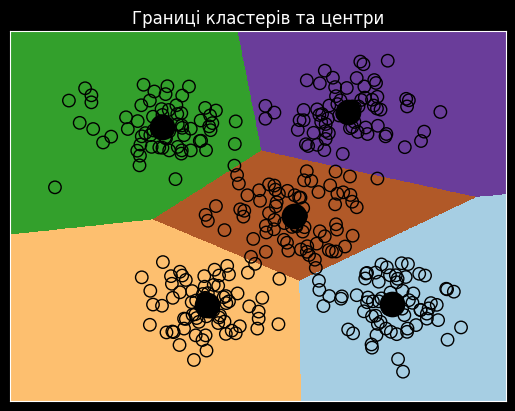

In [4]:
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation="nearest", extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()), cmap=plt.cm.Paired, aspect="auto", origin="lower")
plt.scatter(X[:, 0], X[:, 1], marker="o", facecolors="none", edgecolors="black", s=80)
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="o", s=210, linewidths=4, color="black", zorder=12, facecolors="black")
plt.title("Границі кластерів та центри")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()